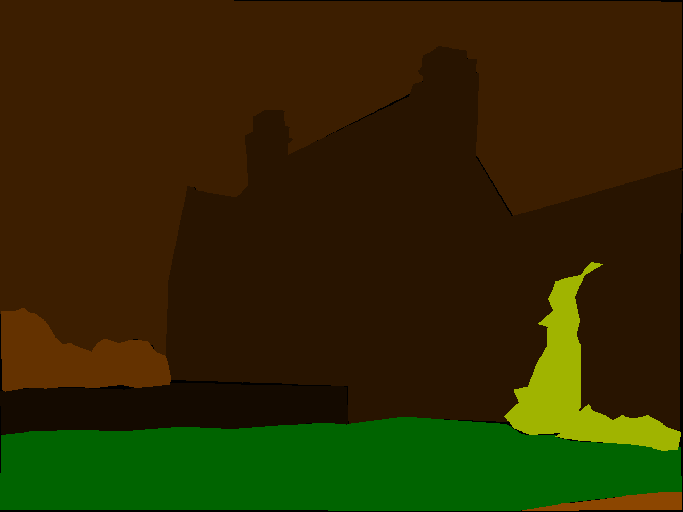

In [29]:
import numpy as np
from PIL import Image

def encode_segmap(mask):
    # Refer : http://groups.csail.mit.edu/vision/datasets/ADE20K/code/loadAde20K.m
    mask = mask.astype(int)
    label_mask = np.zeros((mask.shape[0], mask.shape[1]))
    label_mask = (mask[:, :, 0] / 10.0) * 256 + mask[:, :, 1]
    return np.array(label_mask, dtype=np.uint8)

def decode_segmap(temp, n_classes, plot=False):
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for i in range(0, n_classes):
        r[temp == i] = 20 * (i % 10)
        g[temp == i] = i * 10
        b[temp == i] = 0
    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:, :, 0] = r
    rgb[:, :, 1] = g
    rgb[:, :, 2] = b
    return rgb

f = "/workspace/semantic-segmentation-pytorch/ADE_val_00000001.png"
im = Image.open(f)
mask = np.array(im)

mask = (decode_segmap(mask, 19)).astype(np.uint8)
Image.fromarray(mask)
# encode_segmap(mask)

# mask